# Exploratory data analysis 

Firstly we will take a look on data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import itertools
from itertools import islice
from collections import Counter

In [2]:
links = pd.read_csv("data/links.csv")
movies = pd.read_csv("data/movies.csv")
ratings = pd.read_csv("data/ratings.csv")
tags = pd.read_csv("data/tags.csv")

## Links

Let's take a look on info from dataset README:

---
*Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie, and has the following format:*

    movieId,imdbId,tmdbId

- *movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.*

- *imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.*

- *tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>.*
---

In [3]:
display(links)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


Here we see table that contains movie id and it's id's on movie rates websites. 

Information from these websites may be useful, for example **movie rating** or **actors**.

In [4]:
print("Number of movies: {}".format(len(links["movieId"].unique())))

Number of movies: 9742


In [5]:
print("Number of null values in movieId column: {}".format(
    links["movieId"].isnull().sum()))
print("Number of null values in imdbId column: {}".format(
    links["imdbId"].isnull().sum()))
print("Number of null values in tmdbId column: {}".format(
    links["tmdbId"].isnull().sum()))

Number of null values in movieId column: 0
Number of null values in imdbId column: 0
Number of null values in tmdbId column: 8


I went to [TMDb](https://www.themoviedb.org/) and [IMDb](https://www.imdb.com/) websites and hadn't found relevant information that doesn't exists on [movielens](https://movielens.org/).

Also $8$ films does not have page on tmdb. 

So I think we may get rid of IMDb and TMDb columns and not be afraid of losing information, because in average due to number of votes movie rating will be relatively same.

In [6]:
print("Number of movies: {}".format(len(links["movieId"].unique())))

Number of movies: 9742


## Movies

Info from README:

---
*Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id `1` corresponds to the URL <https://movielens.org/movies/1>). Movie ids are consistent between `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv` (i.e., the same id refers to the same movie across these four data files).*

---
*Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format:*

    movieId,title,genres

*Movie titles are entered manually or imported from <https://www.themoviedb.org/>, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.*

*Genres are a pipe-separated list, and are selected from the following:*

* *Action*
* *Adventure*
* *Animation*
* *Children*'s
* *Comedy*
* *Crime*
* *Documentary*
* *Drama*
* *Fantasy*
* *Film*-Noir
* *Horror*
* *Musical*
* *Mystery*
* *Romance*
* *Sci*-Fi
* *Thriller*
* *War*
* *Western*
* *(no genres listed)*
---

In [7]:
display(movies)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
print("Number of null values in movieId column: {}".format(
    movies["movieId"].isnull().sum()))
print("Number of null values in title column: {}".format(
    movies["title"].isnull().sum()))
print("Number of null values in genres column: {}".format(
    movies["genres"].isnull().sum()))

Number of null values in movieId column: 0
Number of null values in title column: 0
Number of null values in genres column: 0


In [9]:
films_genres = [genres.split("|") for genres in movies["genres"]]

all_genres = list(itertools.chain.from_iterable(films_genres))
print("Unique genres are:\n{}\n".format(set(all_genres)))
print("Number of unique genres:\n{}\n".format(len(set(all_genres))))
print("Total number of genres:\n{}\n".format(len(all_genres)))
print("Average number of genres belongs to film:\n{:.2f}\n".format(
    len(all_genres) / movies.shape[0]))

genres_distribution = {}
for genre in set(all_genres):
    occurrences = 0
    for film_genres in films_genres:
        if genre in film_genres:
            occurrences += 1
    genres_distribution[genre] = occurrences

genres_distribution = {k: v for k, v in sorted(
    genres_distribution.items(), key=lambda item: item[1], reverse=True)}
print("Distribution of genres:\n{}\n".format(genres_distribution))

Unique genres are:
{'Western', 'Fantasy', 'Children', 'Mystery', 'IMAX', 'Thriller', 'Animation', 'Romance', '(no genres listed)', 'War', 'Crime', 'Film-Noir', 'Drama', 'Action', 'Musical', 'Horror', 'Comedy', 'Adventure', 'Documentary', 'Sci-Fi'}

Number of unique genres:
20

Total number of genres:
22084

Average number of genres belongs to film:
2.27

Distribution of genres:
{'Drama': 4361, 'Comedy': 3756, 'Thriller': 1894, 'Action': 1828, 'Romance': 1596, 'Adventure': 1263, 'Crime': 1199, 'Sci-Fi': 980, 'Horror': 978, 'Fantasy': 779, 'Children': 664, 'Animation': 611, 'Mystery': 573, 'Documentary': 440, 'War': 382, 'Musical': 334, 'Western': 167, 'IMAX': 158, 'Film-Noir': 87, '(no genres listed)': 34}



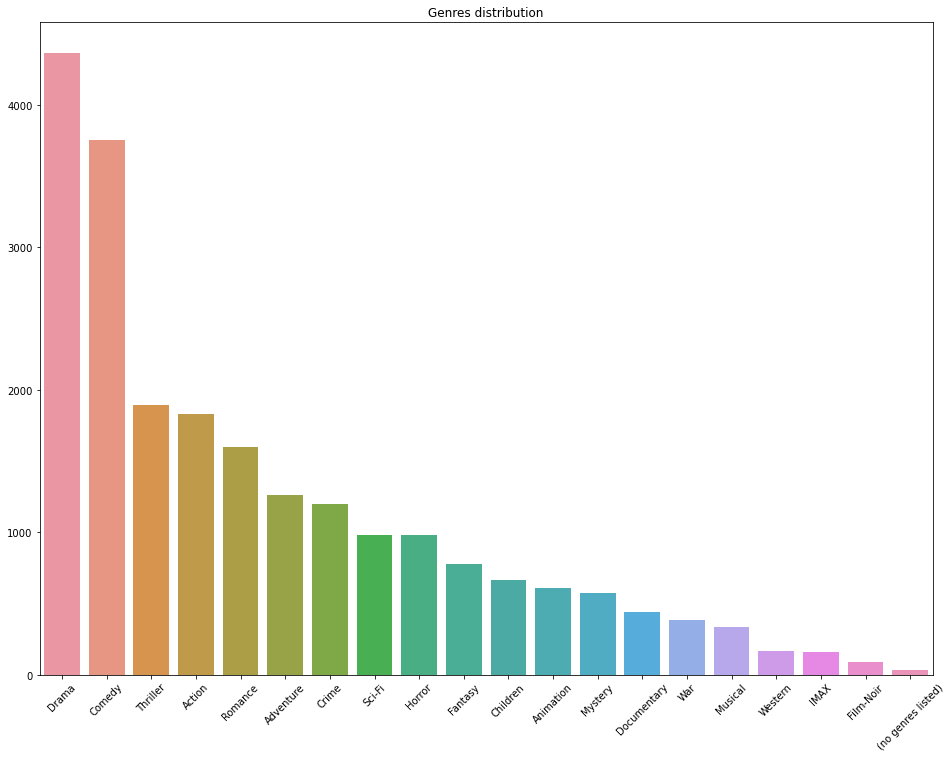

In [10]:
plt.figure(figsize=(16, 12))
sns.barplot(list(genres_distribution.keys()),
            list(genres_distribution.values()))
plt.xticks(rotation='45')
plt.title('Genres distribution')
plt.show()

Film **genre** is very useful info in context of films suggestion task.

I think later we will create a $20$-dimensional vector for each film with ones in places where film belongs to this genre.

In [11]:
movies_titles = movies["title"]
last_characters = [movie[-5:-1] for movie in movies_titles]

print("Unique last characters of film titles:\n{}\n".format(set(last_characters)))

Unique last characters of film titles:
{'1944', 'ron ', '1955', '1949', '1958', '1920', '1971', '1951', '1919', '012)', '1908', 'imal', '973)', '1922', '1929', '014)', '1902', '1976', 'lon ', '2012', '1968', '1943', '1987', '2015', 'irro', '2013', '1970', '1986', '1988', '2004', '1938', '1995', '1959', '2011', ' Bab', '1993', '1916', '1934', '2014', '1962', '1972', '1990', '1924', '1917', '008)', '011)', '1921', '1915', '1977', '998)', '1935', '2002', '1979', '1999', '1978', '1926', '1936', '1932', '1996', '2003', '1992', '1964', '1966', '1928', '1946', '1980', '1948', '1965', '2007', '1956', '1985', '2008', 'r On', '1952', '1994', '1953', '1984', '2016', '2000', '1983', '1939', '007)', '1903', '1998', '1942', '1950', '1975', '1973', '1925', '1981', 'he O', '2017', '1937', '1940', '1941', '1997', 'ligh', '1923', '999)', 'erso', '1982', '2010', 'osmo', '1957', '1989', '1930', '2018', 'atso', '2009', '1954', '995)', '1974', '2001', '1967', '1945', '1991', '2006', '2005', '1969', '1961', 

As we can see, some films **don't have year** on their own, some films have **redundant space** at the end.

We will remove redundant space at the end and add $0000$ year to films without year.

In [12]:
movies_titles_without_reduntant_spaces = [
    (lambda title: title[:-1] if title[-1] == " " else title)(title) for title in movies_titles]

movies_titles_without_reduntant_spaces_with_years = [
    (lambda title: title + "(0000)" if title[-1] != ")" else title)(title) for title in movies_titles_without_reduntant_spaces]

years = [int(movie[-5:-1])
         for movie in movies_titles_without_reduntant_spaces_with_years]
print("Years of film production:\n{}\n".format(set(years)))

years_distribution = dict(Counter(years))
years_distribution = {k: v for k, v in sorted(
    years_distribution.items(), key=lambda item: item[0], reverse=False)}
print("Distribution of years:\n{}\n".format(years_distribution))

Years of film production:
{0, 1902, 1903, 1908, 1915, 1916, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}

Distribution of years:
{0: 12, 1902: 1, 1903: 1, 1908: 1, 1915: 1, 1916: 4, 1917: 1, 1919: 1, 1920: 2, 1921: 1, 1922: 1, 1923: 4, 1924: 5, 1925: 4, 1926: 5, 1927: 7, 1928: 4, 1929: 4, 1930: 5, 1931: 14, 1932: 9, 1933: 12, 1934: 11, 1935: 13, 1936: 18, 1937: 16, 1938: 15, 1939: 23, 1940: 25, 1941: 18, 1942: 23, 1943: 10, 1944: 16, 1

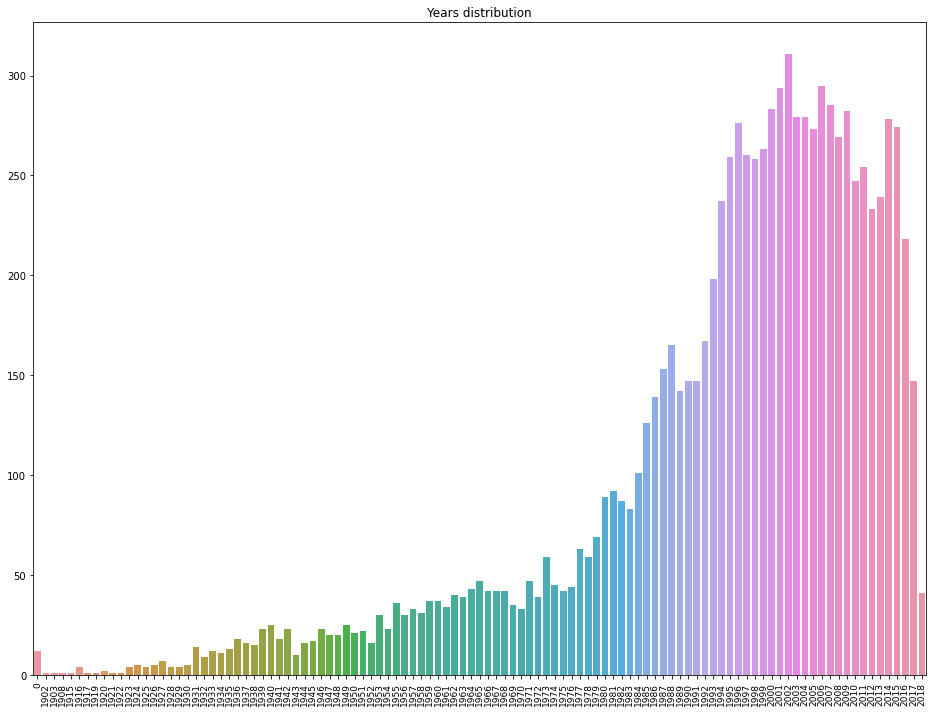

In [13]:
plt.figure(figsize=(16, 12))
sns.barplot(list(years_distribution.keys()),
            list(years_distribution.values()))
plt.xticks(rotation='90', fontsize=9)
plt.title('Years distribution')
plt.show()

**Year** of film production might impact. We should search for **correlations** between average film rate, year of production and genre.

Also we should somehow use **film names**. But right now I have no ideas.

## Ratings

README:

---
*Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.*

---

*MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between `ratings.csv` and `tags.csv` (i.e., the same id refers to the same user across the two files).*

---

*All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:*

    userId,movieId,rating,timestamp

*The lines within this file are ordered first by userId, then, within user, by movieId.*

*Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).*

*Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.*

---

In [14]:
display(ratings)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [15]:
print("Number of null values in userId column: {}".format(
    ratings["userId"].isnull().sum()))
print("Number of null values in movieId column: {}".format(
    ratings["movieId"].isnull().sum()))
print("Number of null values in rating column: {}".format(
    ratings["rating"].isnull().sum()))
print("Number of null values in timestamp column: {}".format(
    ratings["timestamp"].isnull().sum()))

Number of null values in userId column: 0
Number of null values in movieId column: 0
Number of null values in rating column: 0
Number of null values in timestamp column: 0


### Users

Number of unique users:
610

Min number of reviews per user:
20

Max number of reviews per user:
2698

Average reviews per user:
165.30

Users with top number of reviwed films:
[(414, 2698), (599, 2478), (474, 2108), (448, 1864), (274, 1346)]



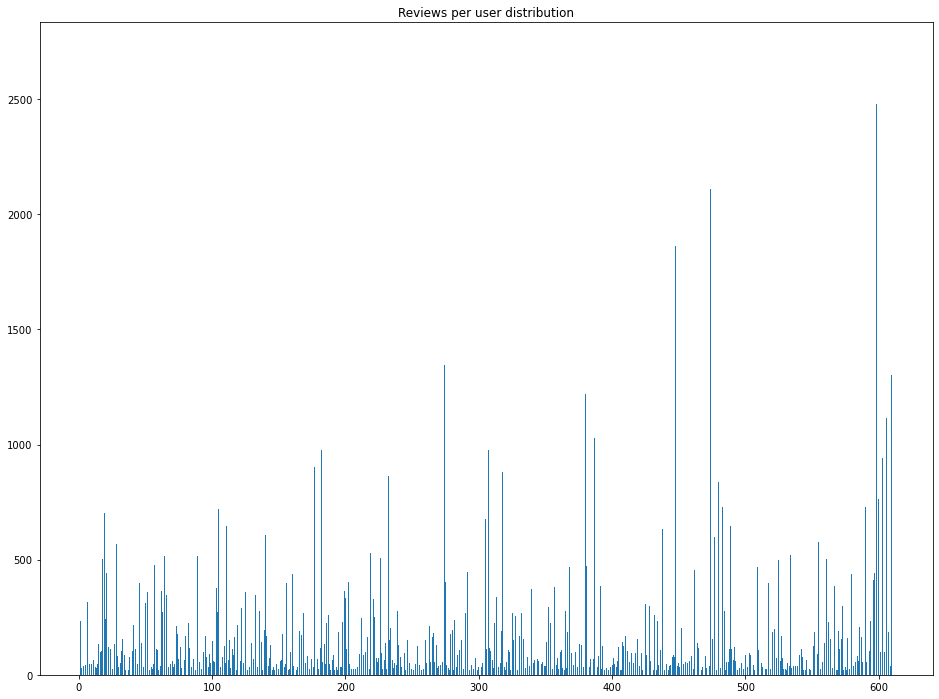

In [16]:
print("Number of unique users:\n{}\n".format(
    len(set(ratings["userId"]))))

user_reviews = dict(Counter(ratings["userId"]))
user_reviews = {k: v for k, v in sorted(
    user_reviews.items(), key=lambda item: item[1], reverse=True)}

print("Min number of reviews per user:\n{}\n".format(min(list(user_reviews.values()))))
print("Max number of reviews per user:\n{}\n".format(max(list(user_reviews.values()))))

print("Average reviews per user:\n{:.2f}\n".format(len(ratings["userId"]) / len(set(ratings["userId"]))))

print("Users with top number of reviwed films:\n{}\n".format(list(islice(user_reviews.items(), 5))))

plt.figure(figsize=(16,12))
plt.hist(ratings["userId"], bins=1000)
plt.title("Reviews per user distribution")
plt.show()

### Movies

In [17]:
print("Number of films:\n{}\n".format(len(set(ratings["movieId"]))))

movies_reviewed = dict(Counter(ratings["movieId"]))
movies_reviewed = {k: v for k, v in sorted(
    movies_reviewed.items(), key=lambda item: item[1], reverse=True)}

print("Min number of reviews of film:\n{}\n".format(min(list(movies_reviewed.values()))))
print("Max number of reviews of film:\n{}\n".format(max(list(movies_reviewed.values()))))

print("Average reviews per film:\n{:.2f}\n".format(len(ratings["movieId"]) / len(set(ratings["movieId"]))))

print("Movies with top number of reviews:\n{}\n".format(list(islice(movies_reviewed.items(), 5))))

Number of films:
9724

Min number of reviews of film:
1

Max number of reviews of film:
329

Average reviews per film:
10.37

Movies with top number of reviews:
[(356, 329), (318, 317), (296, 307), (593, 279), (2571, 278)]



**Not** every of $9742$ films have been **reviewed** at least once (number of reviwed films is $9724$). 

### Rating

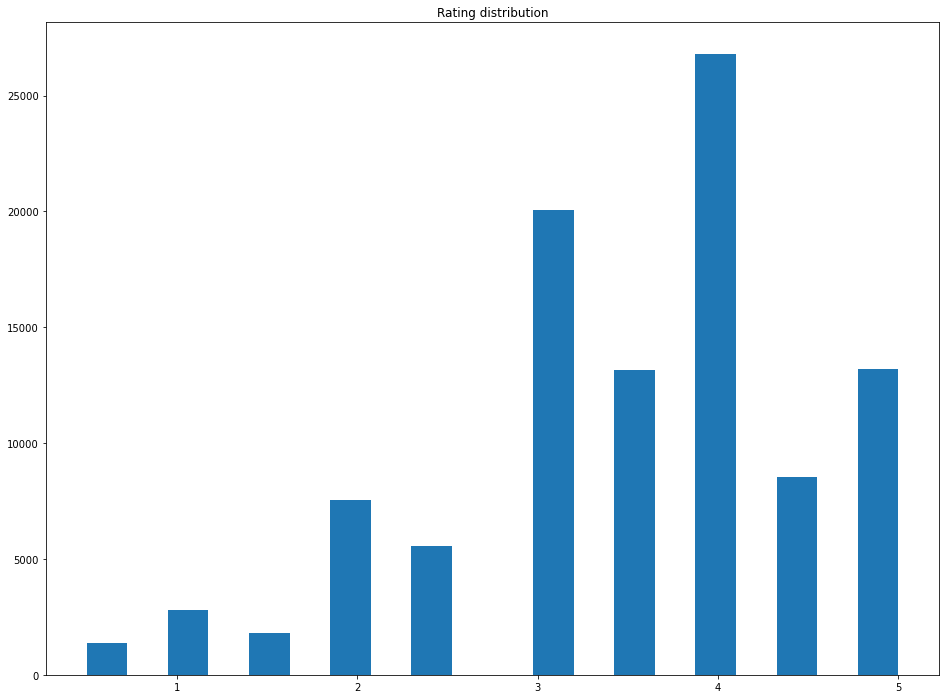

In [18]:
plt.figure(figsize=(16,12))
plt.hist(ratings["rating"], bins=20)
plt.title("Rating distribution")
plt.show()

In [19]:
print("Average rating:\n{:.2f}\n".format(sum(ratings["rating"]) / len(ratings["rating"])))

movies_ratings = {}
unreviewed_movies = []
movies_ids = movies["movieId"]
movies_reviewed_rate = ratings["movieId"]
ratings_marks = ratings["rating"]


for i, movie_id_reviewed in enumerate(movies_reviewed_rate):
    if movie_id_reviewed in movies_ratings:
        movies_ratings[movie_id_reviewed] = [movies_ratings[movie_id_reviewed][0] + ratings_marks[i], movies_ratings[movie_id_reviewed][1] + 1]
    else:
        movies_ratings[movie_id_reviewed] = [ratings_marks[i], 1]
        

movies_ratings = {k: v[0]/v[1] for k, v in movies_ratings.items()}
movies_ratings = {k: v for k, v in sorted(movies_ratings.items(), key=lambda item: item[1], reverse=True)}

print("Top rated movies:\n{}\n".format(list(movies_ratings.items())[:5]))
print("Worst rated movies:\n{}\n".format(list(movies_ratings.items())[-5:]))
print("Movies in the middle:\n{}\n".format(list(movies_ratings.items())[5000:5005]))

Average rating:
3.50

Top rated movies:
[(131724, 5.0), (5746, 5.0), (6835, 5.0), (3851, 5.0), (1151, 5.0)]

Worst rated movies:
[(136297, 0.5), (145724, 0.5), (61818, 0.5), (72424, 0.5), (145951, 0.5)]

Movies in the middle:
[(840, 3.375), (2970, 3.375), (6658, 3.375), (5222, 3.375), (1447, 3.375)]



Top and worse rated movies do not have much reviews, but in average these rates are **representative**.

### Correlations

In [20]:
movies_ids_initial = list(movies["movieId"])

movies_ratings = {k: v for k, v in sorted(movies_ratings.items(), key=lambda item: item[0], reverse=False)}
movies_reviewed = {k: v for k, v in sorted(movies_reviewed.items(), key=lambda item: item[0], reverse=False)}

movies_ids = list(movies_reviewed.keys())
movies_ratings_final = list(movies_ratings.values())
movies_reviewed_final = list(movies_reviewed.values())

years_cutted = []
for movie_id in movies_ids:
    years_cutted.append(years[movies_ids_initial.index(movie_id)])

In [21]:
movies_df = pd.DataFrame(list(zip(movies_ids, movies_reviewed_final, movies_ratings_final, years_cutted)), 
               columns =['movieId', 'reviewN', "rating", "year"]) 
display(movies_df.sample(10))

,movieId,reviewN,rating,year
6662,57910,1,2.000000,2007
5895,33679,59,3.279661,2005
7040,69436,7,2.785714,2009
9067,143255,1,1.500000,2014
2758,3700,1,2.500000,1984
2338,3098,24,3.645833,1984
6428,51933,1,2.500000,2007
4318,6319,3,2.166667,1991
1957,2597,2,2.750000,1999
3105,4178,6,3.500000,1939


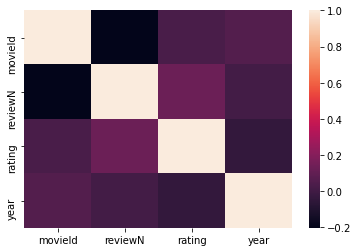

In [22]:
corr = movies_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

ToDo:
- top film rewiewers
- hist film reviwers
- most common reviewed movies
- average movie rating
- top rated movies
- correlation between movie num of rates/ rating / year / genre

## Tags

In [23]:
display(tags)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978
